<img style="float: left;" src="figures/DARTS_21_Sg_grav.PNG" width="20%">   

# <font color='Red'> $\;$ Model for chemical benchmark</font>

## <font color='blue'>The objectives</font>
In this exercise, we run simulation for a chemical benchmark:
1. Introduce phsyics for super model with multiple inheritance
2. Run model for 1D and 2D reservoir
3. Change parameters of the model and observe changes in the results

## <font color='Blue'>Schematics of 1D model</font>

<img style="float: left;" src="figures/chem_bench_1D.png" width="80%">

## <font color='Blue'>Model description</font>

The first model is a setup with an injection well in the first block and a production well in the last block, no flow boundary conditions from left and right (i.e., $\frac{\partial p}{\partial x}|_{x=0} = \frac{\partial p}{\partial x}|_{x=L} = 0 $). Pure $CO_2$ gas stream is injected from the left of a  horizontal column containing pure water at a constant pressure. An outflow boundary condition, with constant pressure, is imposed at the right end of the column.

We use a simplified chemical relationship for this case. It consists of a single chemical reaction (i.e., we cannot reduce the global system of nonlinear equation using the element reduction). The system consists of the following components: {$H_2O$, ${CO_2}$, ${Ca^{+2}}$, ${CO_3^{-2}}$, ${CaCO_3}$} and the kinetic reaction equation consists of

\begin{align}
\label{eq:calcdiss}
    {CaCO_3 <=> Ca^{+2} + CO_3^{-2}}.
\end{align}

Here we assume that the chemical reaction is kinetic. The kinetic rate is written as

\begin{equation}\label{kinetic_react}
    r_k = A_s K_k \left(1 - \frac{Q}{K_{sp}}\right) %x_{CO_2, w}
\end{equation}

where $A_s$ is the reactive surface area, which is a linear function of the solid saturation ($A_s = A_0 \hat{s}_s =(1-\phi_0)\hat{s}_s)$, $K_k$ is the kinetic reaction constant, $Q$ is the activity product and $K_{sp}$  is the equilibrium constant.

## <font color='Blue'>Super-engine physics</font>

Here we introduce custom [Model](https://gitlab.com/open-darts/darts-workshop/-/blob/main/model_chem_bench.py) class based on [DartsModel](https://gitlab.com/open-darts/open-darts/-/blob/development/darts/models/darts_model.py) which is using [SuperPhysics](https://gitlab.com/open-darts/open-darts/-/tree/development/darts/physics/super/physics.py). 

In [4]:
from model_chem_bench import Model
from darts.engines import value_vector, redirect_darts_output

n = Model(grid_1D=True)
n.init()
n.params.max_ts = 1

n.run_python(2000)
n.print_timers()
n.print_stat()


darts-package built on 03/12/2023 15:29:52 by SRV554$@SRV554 from 688ff7e1-dirty
Building connection list...
# 1 	T = 0.001	DT = 0.001	NI = 4	LI=7
# 2 	T = 0.003	DT = 0.002	NI = 1	LI=3
# 3 	T = 0.007	DT = 0.004	NI = 1	LI=3
# 4 	T = 0.015	DT = 0.008	NI = 1	LI=3
# 5 	T = 0.031	DT = 0.016	NI = 1	LI=3
# 6 	T = 0.063	DT = 0.032	NI = 1	LI=3
# 7 	T = 0.127	DT = 0.064	NI = 1	LI=3
# 8 	T = 0.255	DT = 0.128	NI = 1	LI=3
# 9 	T = 0.511	DT = 0.256	NI = 2	LI=6
# 10 	T = 1.023	DT = 0.512	NI = 2	LI=6
# 11 	T = 2.023	DT =  1	NI = 2	LI=6
# 12 	T = 3.023	DT =  1	NI = 2	LI=6
# 13 	T = 4.023	DT =  1	NI = 2	LI=6
# 14 	T = 5.023	DT =  1	NI = 3	LI=9
# 15 	T = 6.023	DT =  1	NI = 3	LI=9
# 16 	T = 7.023	DT =  1	NI = 2	LI=6
# 17 	T = 8.023	DT =  1	NI = 2	LI=6
# 18 	T = 9.023	DT =  1	NI = 2	LI=6
# 19 	T = 10.023	DT =  1	NI = 3	LI=9
# 20 	T = 11.023	DT =  1	NI = 2	LI=6
# 21 	T = 12.023	DT =  1	NI = 2	LI=6
# 22 	T = 13.023	DT =  1	NI = 2	LI=6
# 23 	T = 14.023	DT =  1	NI = 2	LI=6
# 24 	T = 15.023	DT =  1	NI = 3	LI=9


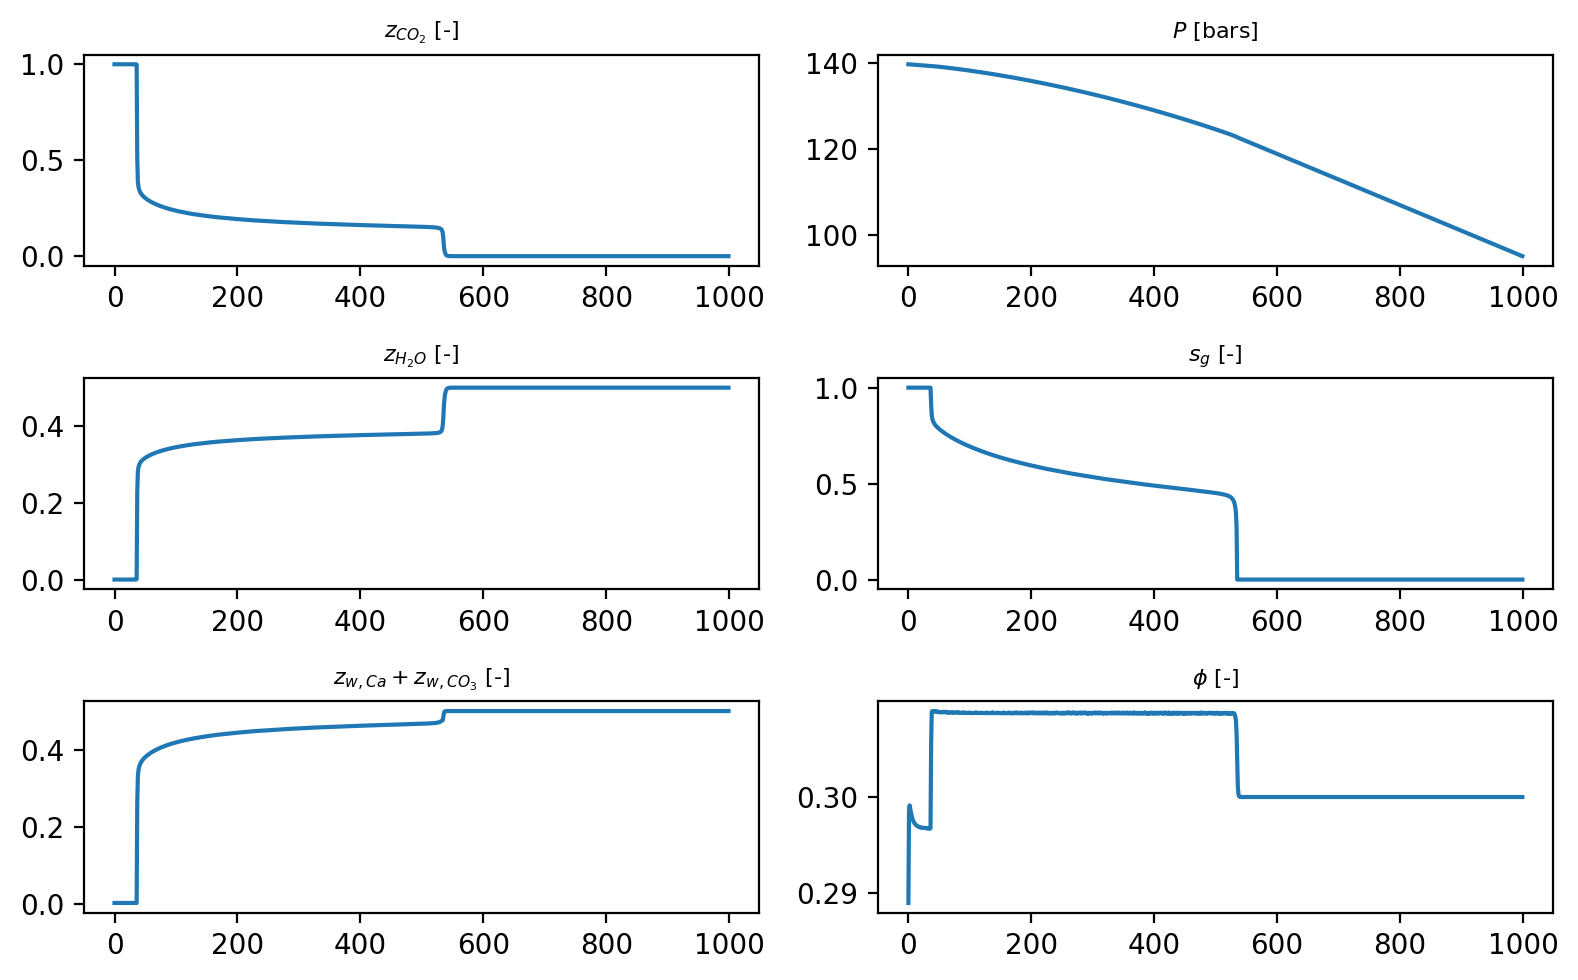

In [2]:
n.print_and_plot_1D()
#CACO3 creating lesser/ porosity vaporization shock

## <font color='Blue'>Schematics of 2D model</font>

<img style="float: left;" src="figures/chem_bench_2D.PNG" width="80%">

The second test case consists of a two-dimensional heterogeneous domain. In the model, a zone of high porosity (and permeability) is embedded within a lower porosity (and permeability) zone. The domain extends for 10 [m] in the $y$-direction and all the other measures are mentioned in the figure above. The boundary conditions are constant injection rate on the left with bottom half of the domain pure ${CO_2}$, top half pure ${H_2O}$. The constant pressure is defined on the right boundary (outflow) with no-flow conditions on top and bottom. 

## <font color='Blue'>Tasks in this workshop: run 2D model and check all data flow </font>

In [ ]:
from model_chem_bench import Model
from darts.engines import value_vector, redirect_darts_output

k = Model()
k.set_physics()
k.set_sim_params(first_ts=0.001, mult_ts=2, max_ts=5, runtime=1000, tol_newton=1e-2, tol_linear=1e-3,
                 it_newton=10, it_linear=50, newton_type=sim_params.newton_local_chop)
k.initial_values = {m.physics.vars[0]: state[0],
                    m.physics.vars[1]: state[1],
                    m.physics.vars[2]: state[2]}

k.init()
k.params.max_ts = 1


plot2D(k)
plt.show()

k.run_python(2000)
k.print_timers()
k.print_stat()